In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as snd
# for showing all the plots inline
%matplotlib inline

In [13]:
df = pd.read_csv('blogs_categories.csv')

In [14]:
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [15]:
df= df.iloc[:,1:]

In [16]:
df.head()

,Data,Labels
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    19997 non-null  object
 1   Labels  19997 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [18]:
df.shape

(19997, 2)

In [19]:
# Check for missing values
missing_values = df.isnull().sum()

In [20]:
missing_values

Data      0
Labels    0
dtype: int64

In [21]:
df['Labels'].value_counts()

Labels
alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
Name: count, dtype: int64

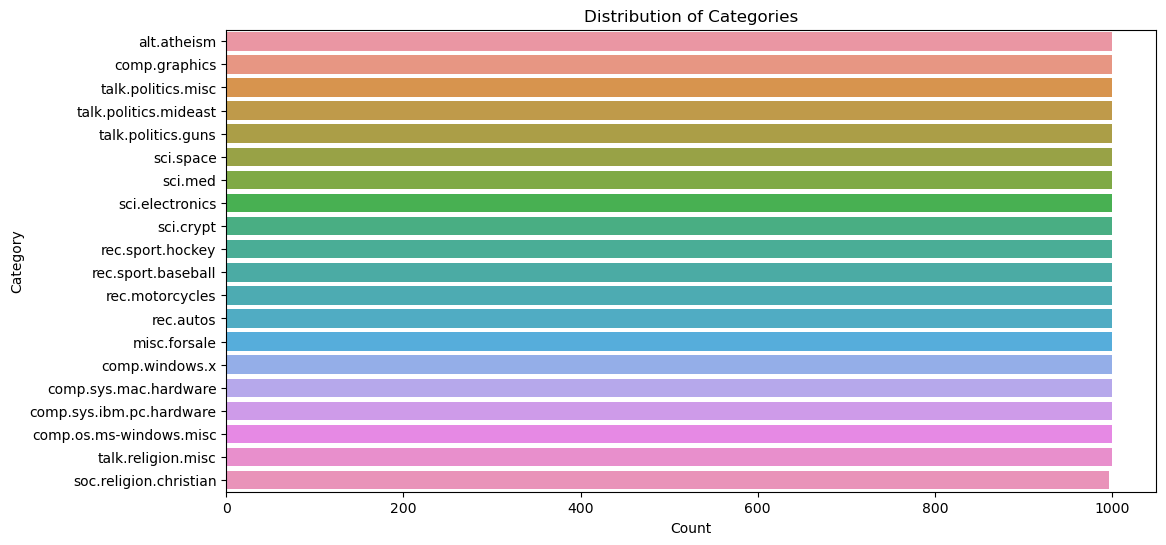

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of categories
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Labels'], order=df['Labels'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


### Checking count of words

In [23]:
df['word_count'] = df['Data'].apply(lambda x: len(str(x).split(" ")))
df[['Data','word_count']].head()

,Data,word_count
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,2011
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,5064
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,688
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,320
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,118


### Num of charaters

In [24]:
df['char_count'] = df['Data'].str.len()
df[['Data','char_count']].head()

,Data,char_count
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,12424
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,32530
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,4550
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,2067
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,1347


In [25]:
df['hashtags'] = df['Data'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['Data','hashtags']].head()

,Data,hashtags
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,1
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,0
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,0
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,0


In [26]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Text Preprocessing Function

In [27]:

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [28]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    words = text.lower().split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

### Apply Preprocessing

In [29]:
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

In [30]:
df_clean = df['Cleaned_Data']

In [31]:
df_clean

0        xref cantaloupe srv c cmu edu alt atheism 4996...
1        xref cantaloupe srv c cmu edu alt atheism 5106...
2        newsgroups alt atheism path cantaloupe srv c c...
3        xref cantaloupe srv c cmu edu alt atheism 5112...
4        xref cantaloupe srv c cmu edu alt atheism 5112...
                               ...                        
19992    xref cantaloupe srv c cmu edu alt atheism 5448...
19993    xref cantaloupe srv c cmu edu alt atheism 5448...
19994    xref cantaloupe srv c cmu edu talk religion mi...
19995    xref cantaloupe srv c cmu edu talk religion mi...
19996    xref cantaloupe srv c cmu edu talk abortion 12...
Name: Cleaned_Data, Length: 19997, dtype: object

In [32]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [33]:
corpus = []

In [34]:
for i in range(0, 19997):
  review = re.sub('[^a-zA-Z]' , ' ' , df['Cleaned_Data'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

In [35]:
corpus

['xref cantaloup srv c cmu edu alt atheism alt atheism moder news answer alt answer path cantaloup srv c cmu edu crabappl srv c cmu edu bb andrew cmu edu news sei cmu edu ci ohio state edu magnu ac ohio state edu usenet cwru edu agat spool mu edu uunet pipex ibmpcug manti mathew mathew mathew manti co uk newsgroup alt atheism alt atheism moder news answer alt answer subject alt atheism faq atheist resourc summari book address music anyth relat atheism keyword faq atheism book music fiction address contact messag id manti co uk date mon mar gmt expir thu apr gmt followup alt atheism distribut world organ manti consult cambridg uk approv news answer request mit edu supersed manti co uk line archiv name atheism resourc alt atheism archiv name resourc last modifi decemb version atheist resourc address atheist organ usa freedom religion foundat darwin fish bumper sticker assort atheist paraphernalia avail freedom religion foundat u write ffrf p box madison wi telephon evolut design evolut d

In [36]:
# Joining the list into one string/te
blogs_text = ' '.join(corpus)
len(blogs_text)  

27286567

In [37]:
from textblob import TextBlob

def correct_spelling(text):
    blob = TextBlobblogs_(text)
    corrected_text = blob.correct()
    return str(corrected_text)


In [38]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [39]:
blog_tokens = word_tokenize(blogs_text)
sen_tokens = sent_tokenize(blogs_text)

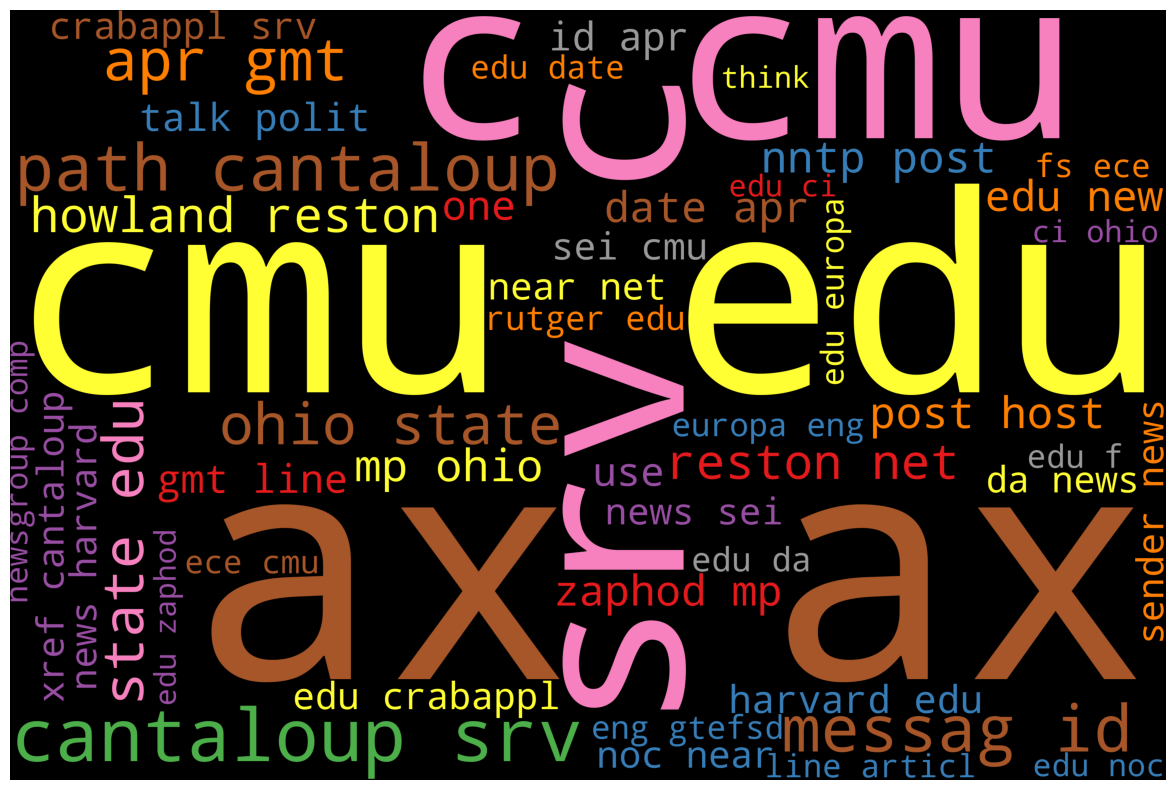

In [40]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(16,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(blogs_text)
plot_cloud(wordcloud)


### Feature Extraction

In [41]:

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Data']).toarray()
y = df['Labels']

### Train-Test Split

In [42]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [43]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

### Model Evaluation

In [44]:
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8855


In [45]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.80      0.82      0.81       173
           comp.graphics       0.79      0.86      0.82       179
 comp.os.ms-windows.misc       0.89      0.83      0.86       226
comp.sys.ibm.pc.hardware       0.82      0.84      0.83       204
   comp.sys.mac.hardware       0.88      0.93      0.90       205
          comp.windows.x       0.85      0.88      0.86       186
            misc.forsale       0.84      0.91      0.87       190
               rec.autos       0.87      0.92      0.89       203
         rec.motorcycles       0.95      0.92      0.94       218
      rec.sport.baseball       0.97      0.94      0.95       192
        rec.sport.hockey       0.96      0.97      0.96       203
               sci.crypt       0.96      0.96      0.96       200
         sci.electronics       0.93      0.89      0.91       227
                 sci.med       0.99      0.90      

In [46]:
cm = confusion_matrix(y_test, y_pred)

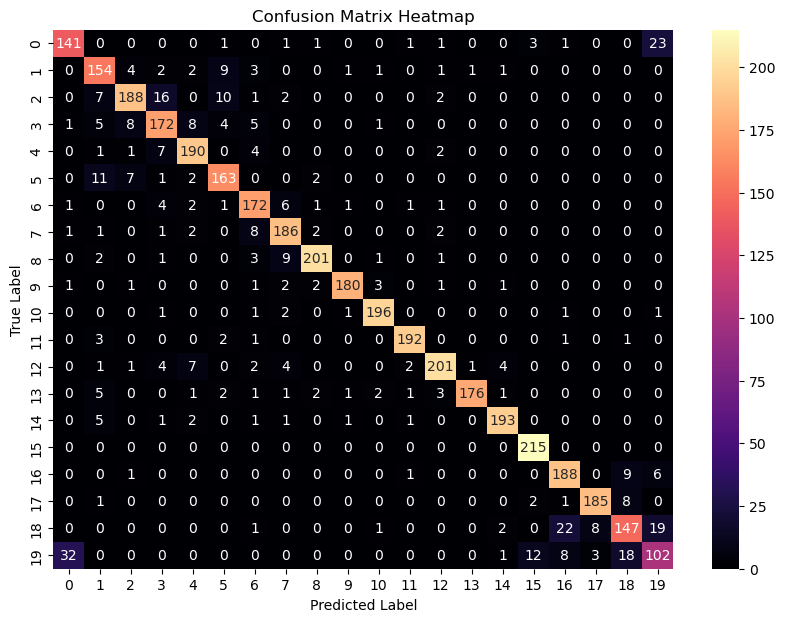

In [47]:
# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()